In [1]:
import matplotlib.pyplot as plt
plt.style.use("nature_neurosci.mplstyle")


# Define colors
colors = {
    "Single": "#333333",
    "Left": "#246EB9",
    "Right": "#8B1E3F",
    "Ipsilateral": "#1B9E77",
    "Contralateral": "#D95F02",
    "Within": "#2B4162",
    "Across": "#E89D0B",
    'SerialBiasWeak': '#254441',
    'SerialBias': '#43AA8B',\
    'ReactivationWeak': '#7A8A99',
    'Reactivation': '#12719E'
}

from matplotlib.colors import LinearSegmentedColormap
left_right_cmap = LinearSegmentedColormap.from_list("LeftRight",\
                                                     [colors['Left'], "white", colors['Right']])
ipsi_contra_cmap = LinearSegmentedColormap.from_list("IpsiContra",\
                                                     [colors['Ipsilateral'], "white", colors['Contralateral']])
within_cmap = LinearSegmentedColormap.from_list("Within",\
                                                     ["white", colors['Within']])
across_cmap = LinearSegmentedColormap.from_list("Across",\
                                                     ["white", colors['Across']])

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array-value)).argmin()
    return idx

def normgauss(xxx,sigma):
    gauss = (1/(sigma*np.sqrt(2*np.pi)) *np.exp(-(xxx-0)**2 / (2*sigma**2)))
    return gauss/gauss.max()

def normgrad(xxx):
    return np.gradient(xxx)/np.gradient(xxx).max()

def dog1(sigma,x):
    xxx     = np.arange(-2*np.pi, 2*np.pi, .0001) 
    dog_1st = normgrad(normgauss(xxx,sigma))
    return np.array(list(map(lambda x: dog_1st[find_nearest(xxx,x)], x)))

def mov_avg(rel_loc, err, w1, w2, folded):
    '''
    Moving average filter

    Parameters
    ----------
    rel_loc : relative location of stimuli (prevcurr)
    err : error of current stimulus
    w1 : width of window
    w2 : shift of window
    folded: wheather to project all errors on (0,np.pi): True or (-np.pi,np.pi):False


    Returns
    -------
    err_avg : moving averaged error
    err_std : sem of moving averaged error
    '''    
   
    m_err=[]
    std_err=[]
    count=[]
    cis=[]
    x = np.arange(-np.pi,np.pi,w1)
    if folded:
        err = np.array([np.sign(rel_loc[i])*err[i] if np.sign(rel_loc[i])!=0 else err[i] for i in range(len(err))])
        rel_loc = np.abs(rel_loc)
        x = np.arange(0,np.pi,w1)
    for i,t in enumerate(x):
        idx=abs(circdist(rel_loc,t)) <= w2/2
        m_err.append(np.mean(err[idx]))
        std_err.append(sem(err[idx]))
           
    return (x), np.array(m_err),np.array(std_err)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cmath import phase
from scipy.stats import circmean, sem
import random
from ast import literal_eval
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib

def len2(x):
	if type(x) is not type([]):
		if type(x) is not type(np.array([])):
			return -1
	return len(x)

def phase2(x):
	if not np.isnan(x):
		return phase(x)
	return np.nan

def circdist(angles1,angles2):
    if len2(angles2) < 0:
        if len2(angles1) > 0:
            angles2 = [angles2]*len(angles1)
        else:
            angles2 = [angles2]
            angles1 = [angles1]
        if len2(angles1) < 0:
            angles1 = [angles1]*len(angles2)
    return np.array(list(map(lambda a1,a2: phase2(np.exp(1j*a1)/np.exp(1j*a2)), angles1,angles2)))

def sig_bar(sigs,axis,y,ax,color):
	w=np.diff(axis)[0]
	for s in sigs:
		beg =axis[s]-w/2
		end = axis[s]+w/2
		ax.fill_between([beg,end],[y[0],y[0]],[y[1],y[1]],color=color)
        
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array-value)).argmin()
    return idx

def normgauss(xxx,sigma):
    gauss = (1/(sigma*np.sqrt(2*np.pi)) *np.exp(-(xxx-0)**2 / (2*sigma**2)))
    return gauss/gauss.max()

def normgrad(xxx):
    return np.gradient(xxx)/np.gradient(xxx).max()

def dog1(sigma,x):
    xxx     = np.arange(-2*np.pi, 2*np.pi, .0001) 
    dog_1st = normgrad(normgauss(xxx,sigma))
    return np.array(list(map(lambda x: dog_1st[find_nearest(xxx,x)], x)))

def mov_avg(rel_loc, err, w1, w2, folded):  
    m_err=[]
    std_err=[]
    count=[]
    cis=[]
    x = np.arange(-np.pi,np.pi,w1)
    if folded:
        err = np.array([np.sign(rel_loc[i])*err[i] if np.sign(rel_loc[i])!=0 else err[i] for i in range(len(err))])
        rel_loc = np.abs(rel_loc)
        x = np.arange(0,np.pi,w1)
    for i,t in enumerate(x):
        idx=abs(circdist(rel_loc,t)) <= w2/2
        m_err.append(np.mean(err[idx]))
        std_err.append(sem(err[idx]))
           
    return (x), np.array(m_err),np.array(std_err)


---

In [4]:
loc = './Results/Figure4/'
filename = loc + 'TwoAreaVaryingUntunedConnect_Stim3'

df_models = pd.read_csv(filename+'.csv')

try:
    df_models['FR_area1'] = [literal_eval(df_models['FR_area1'][i]) for i in df_models.index]
    df_models['FR_area2'] = [literal_eval(df_models['FR_area2'][i]) for i in df_models.index]
    df_models['FR_center1_area1'] = [literal_eval(df_models['FR_center1_area1'][i]) for i in df_models.index]
    df_models['FR_center1_area2'] = [literal_eval(df_models['FR_center1_area2'][i]) for i in df_models.index]
    df_models['bump_average_area1'] = [literal_eval(df_models['bump_average_area1'][i]) for i in df_models.index]
    df_models['bump_average_area2'] = [literal_eval(df_models['bump_average_area2'][i]) for i in df_models.index]
    df_models['time_average'] = [literal_eval(df_models['time_average'][i]) for i in df_models.index]
except KeyError:
    # first time running need to rename some columns
    cols = ['nan1','stim1_location', 'stim2_location',\
                'FR_area1', 'FR_area2',\
                'FR_center1_area1', 'FR_center1_area2',\
                'response1_area1', 'responsestrength1_area1','reactivation_area1', 'REACT1',\
                'response2_area1','responsestrength2_area1',\
                'response1_area2', 'responsestrength1_area2', 'reactivation_area2', 'REACT2',\
                'reactstrength_area1', 'reactstrength_area2',\
                'response2_area2', 'responsestrength2_area2',\
                'delay1', 'delay2',\
                'ITI',\
                'stim_start', 'stim2_start',\
                'stim_duration',\
                'react_start', 'react_end',\
                'react_strength',\
                'bump_average_area1', 'bump_average_area2',\
                'time_average',\
                'window', 'steps', 'across_factor']
    df_models = df_models.rename(columns={df_models.columns[i]: cols[i] for i in range(len(cols))})

    df_models.drop(['nan1'],axis=1, inplace=True)
    df_models.to_csv(filename+'.csv')
    
    df_models['FR_area1'] = [literal_eval(df_models['FR_area1'][i]) for i in df_models.index]
    df_models['FR_area2'] = [literal_eval(df_models['FR_area2'][i]) for i in df_models.index]
    df_models['FR_center1_area1'] = [literal_eval(df_models['FR_center1_area1'][i]) for i in df_models.index]
    df_models['FR_center1_area2'] = [literal_eval(df_models['FR_center1_area2'][i]) for i in df_models.index]
    df_models['bump_average_area1'] = [literal_eval(df_models['bump_average_area1'][i]) for i in df_models.index]
    df_models['bump_average_area2'] = [literal_eval(df_models['bump_average_area2'][i]) for i in df_models.index]
    df_models['time_average'] = [literal_eval(df_models['time_average'][i]) for i in df_models.index]

    
df_models['stim1_location_rad'] = np.deg2rad(df_models.stim1_location) -\
                        (np.deg2rad(df_models.stim1_location)>np.pi).astype(int)*2*np.pi
df_models['stim2_location_rad'] = np.deg2rad(df_models.stim2_location) -\
                        (np.deg2rad(df_models.stim2_location)>np.pi).astype(int)*2*np.pi

# response as average from both sides
df_models['response1'] = circmean([df_models['response1_area1'].values, df_models['response1_area2'].values],\
                                  low=-np.pi, high=np.pi, axis=0)
df_models['response2'] = circmean([df_models['response2_area1'].values, df_models['response2_area2'].values],\
                                  low=-np.pi, high=np.pi, axis=0)
df_models['response1Err'] = circdist(df_models.response1.values, (df_models.stim1_location_rad.values))
df_models['response2Err'] = circdist(df_models.response2.values, (df_models.stim2_location_rad.values))

df_models['across_factor_label'] = [str(i*100)+'%' if i>=0 else 'random' for i in df_models['across_factor'].values]
df_models['across_factor'] = [i if i!=-0.01 else 0.014 for i in df_models['across_factor'].values]

conn_strengths = np.unique(df_models.across_factor)
conn_strength_labels = [np.unique(df_models[df_models.across_factor == i].across_factor_label)[0] for i in conn_strengths]

# colors
colors_cmap = ["#2b4162ff", "#8D9B5E", "#E89D0B", "#EB6424", "#B33B1E", "#7B1F2A"]
colors_cmap = ["#2b4162ff", '#12729d80', "#E89D0B", "#EB6424"]
cmap = LinearSegmentedColormap.from_list("custom_model_cmap", colors_cmap, N=256)
colors_conn = {f: cmap(0.1+i/(5+1)) if f!=0.014 else '#333333' for i, f in enumerate(conn_strengths)}

cmap = matplotlib.cm.get_cmap('autumn_r')
colors_across = {f: cmap(0.1+i/(5+1)) for i, f in enumerate(conn_strengths)}

cmap = matplotlib.cm.get_cmap('Greens_r')
colors_within = {f: cmap(0.1+i/(5+1)) for i, f in enumerate(conn_strengths)}


DoG_SIGMA=0.6


print('# simulations: '+str(len(df_models)))


# simulations: 60000


In [5]:
# TIMINGS

# indexes of bump average (window=200ms, step=100ms)
index_stim1start = int(np.round((df_models.stim_start.unique()[0]/1000)/df_models.steps.unique()[0]))
index_stim1end = int(np.round(((df_models.stim_start.unique()[0]+df_models.stim_duration[0])/1000)/df_models.steps.unique()[0]))
index_trial1end = int(np.round((df_models.stim2_start.unique()[0]/1000-np.unique(df_models.window)[0])/df_models.steps.unique()[0]))
index_stim2start = int(np.round((df_models.stim2_start.unique()[0]/1000)/df_models.steps.unique()[0]))

#timings in seconds
time_stim1start = df_models.stim_start.unique()[0]/1000 - df_models.window.unique()[0]
time_stim1end = df_models.stim_start.unique()[0]/1000 + (df_models.stim_duration.unique()[0])/1000 

time_reactstart = df_models.react_start.unique()[0]/1000 - df_models.window.unique()[0]
time_reactend = df_models.react_end.unique()[0]/1000 + df_models.window.unique()[0]

time_stim2start = df_models.stim2_start.unique()[0]/1000 - df_models.window.unique()[0]
time_stim2end = df_models.stim2_start.unique()[0]/1000 + (df_models.stim_duration.unique()[0])/1000 

time_end = len(df_models.FR_center1_area1[0])*df_models.steps.unique()[0]



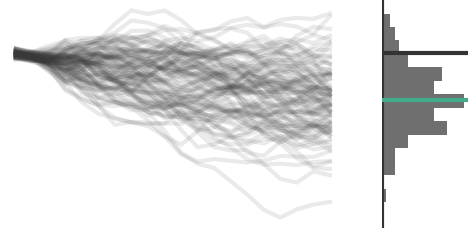

In [6]:
error_a1 = 1.5*np.array([circdist(df_models.bump_average_area1[i][index_stim1start:30], df_models.stim1_location_rad[i])\
            for i in range(100)])
drift = -np.linspace(0, 0.15, error_a1.shape[1])

error_withdrift = error_a1+drift

f,ax = plt.subplots(1,2,figsize=(1.8, 1), gridspec_kw={'width_ratios': [0.8, 0.2]}, sharey=True)
xx = np.linspace(0, index_stim1end-index_stim1start, error_a1.shape[1])
#ax[0].axhline(color='#333333')
ax[0].plot(xx, error_withdrift.T, color='#333333', alpha=0.1)
ax[0].axis('off')

ax[1].hist(error_withdrift[:,-1], orientation='horizontal', bins=14, color='#333333', edgecolor='None',alpha=0.7)
ax[1].axvline(color='#333333')
ax[1].axhline(color='#333333')
ax[1].axhline(np.mean(error_withdrift[:,-1]), color=colors['SerialBias'])
ax[1].axis('off')
plt.tight_layout()
#plt.savefig('./Figures/Figure1/Figure1_DriftDiffusion.svg')
plt.show()

### Figure 4c: Are conn. strengths advantageous for precision?

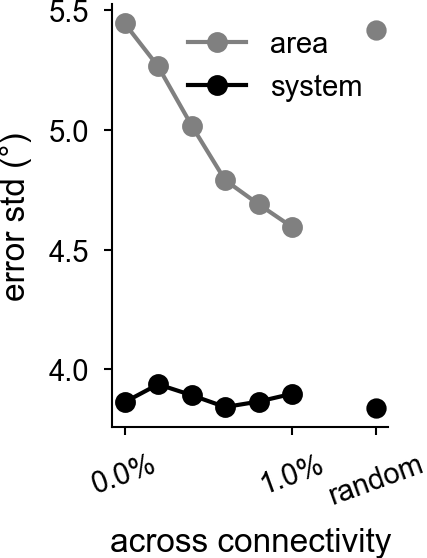

In [7]:
conn_strengths_resorted = conn_strengths#np.roll(conn_strengths, 1)
conn_labels_resorted = conn_strengths#np.roll(conn_strength_labels, 1)

std_area = {s:[] for s in conn_strengths_resorted}
std_system = {s:[] for s in conn_strengths_resorted}

for s, strength in enumerate(conn_strengths_resorted):
    df = df_models.loc[df_models.across_factor==strength].copy().reset_index(drop=True)
    
    # average complex responses of both areas for full-system response
    z_area1 = df.responsestrength1_area1 * np.exp(df.response1_area1*1j)
    z_area2 = df.responsestrength1_area2 * np.exp(df.response1_area2*1j)
    z_system = (z_area1 + z_area2)/2

    # compute errors (area, system)
    error_area1 = np.rad2deg(circdist(df.response1_area1.values, df.stim1_location_rad.values))
    error_area2 = np.rad2deg(circdist(df.response1_area2.values, df.stim1_location_rad.values))
    
    # combine individual errors 
    error_area = np.append(error_area1, error_area2)
    # average of each of the errors for each trial
    error_system = np.rad2deg(circdist(np.angle(z_system), df.stim1_location_rad.values))

    # compute standard deviation of each model split
    std_area[strength] = np.std(error_area)
    std_system[strength] = np.std(error_system)
    
f,ax = plt.subplots(figsize=(1.7, 2.1))
sns.despine()
# area
ax.plot(list(std_area.keys())[:-1], list(std_area.values())[:-1], marker='o', label='area',\
        color='grey', markersize=4)
xvalue_star = -0.004
ax.scatter(list(std_area.keys())[-1]+0.001, list(std_area.values())[-1], marker='o', color='grey', s=15)
# system
ax.plot(list(std_system.keys())[:-1], list(std_system.values())[:-1], marker='o', label='system', color='k', markersize=4)
ax.scatter(list(std_system.keys())[-1]+0.001, list(std_system.values())[-1], marker='o', color='k', s=15)
ax.set_xticks([conn_strengths[0],\
             conn_strengths[5], conn_strengths[-1]+0.001])
ax.set_xticklabels([conn_strength_labels[0], conn_strength_labels[5],\
                    'random'], rotation=20)
ax.set_xlabel('across connectivity')
ax.set_ylabel('error std (°)')
plt.legend()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.tight_layout()
#plt.savefig('./Figures/Figure4/ModelComparison_PrecisionByModeltype.svg')


### Figure 4d: Does connectivity make networks more stable?

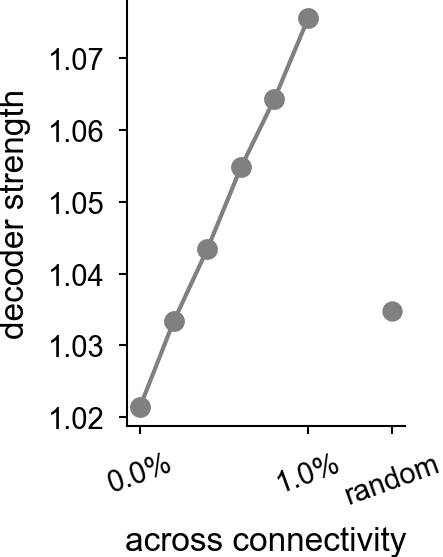

In [8]:
conn_strengths_resorted = conn_strengths#np.roll(conn_strengths, 1)
conn_labels_resorted = conn_strengths#np.roll(conn_strength_labels, 1)

strength_area = {s:[] for s in conn_strengths_resorted}
for s, strength in enumerate(conn_strengths_resorted):
    df = df_models.loc[df_models.across_factor==strength].copy().reset_index(drop=True)
    
    # strength of an area
    strength_area[strength] = np.mean(df.responsestrength1_area1.values)
    
    
f,ax = plt.subplots(figsize=(1.7, 2.1))
sns.despine()
# area
ax.plot(list(strength_area.keys())[:-1], list(strength_area.values())[:-1],\
        marker='o', label='area', color='grey', markersize=4)
xvalue_star = -0.004
ax.scatter(list(strength_area.keys())[-1]+0.001, list(strength_area.values())[-1], marker='o', color='grey', s=15)
ax.set_xticks([conn_strengths[0],\
             conn_strengths[5], conn_strengths[-1]+0.001])
ax.set_xticklabels([conn_strength_labels[0], conn_strength_labels[5],\
                    'random'], rotation=20)
ax.set_xlabel('across connectivity')
ax.set_ylabel('decoder strength')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.tight_layout()
#plt.savefig('./Figures/Figure4/ModelComparison_StrengthByModeltype.svg')

### Figure 4e: Error correlation between areas

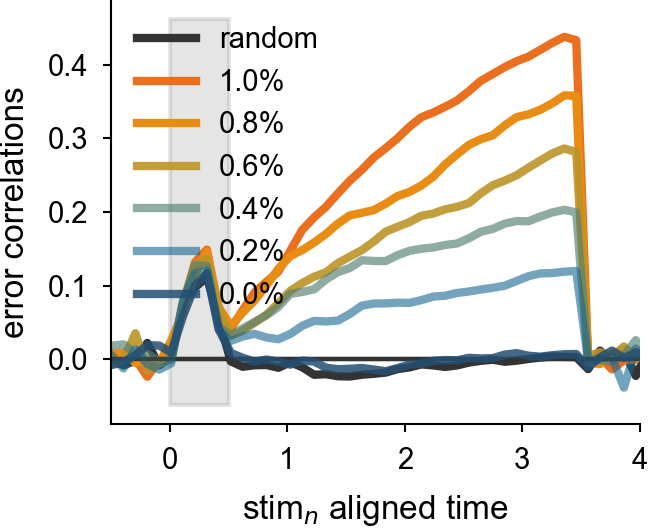

In [9]:
f,ax = plt.subplots(figsize=(2.4, 2))
pvalues=[]
for s, strength in enumerate(conn_strengths[::-1]):
    df = df_models.loc[df_models.across_factor==strength].copy().reset_index(drop=True)

    #bump_average_a1 = np.array([np.array(df.bump_average_area1[i]) for i in df.index])
    bump_average_a1 = np.array([np.array(df.bump_average_area1[i])\
                                for i in df.index])
    bump_average_a2 = np.array([np.array(df.bump_average_area2[i]) for i in df.index])


    # compute previous trial's error
    errorfull_a1 = np.array([circdist(bump_average_a1[i][:index_trial1end], (df.stim1_location_rad[i]))\
                for i in range(len(bump_average_a1))])
    errorfull_a2 = np.array([circdist(bump_average_a2[i][:index_trial1end], df.stim1_location_rad[i])\
                for i in range(len(bump_average_a1))])

    # true correlation between errors across areas
    across_corr = [pearsonr(errorfull_a1[:,times], errorfull_a2[:,times])[0]\
                   for times in range(errorfull_a1.shape[1])]

    pvalues.append(np.array([pearsonr(errorfull_a1[:,times], errorfull_a2[:,times])[1]\
                             for times in range(errorfull_a1.shape[1])]))

    # bootstrapped correlations for errorbars
    repeats = 20
    bt_correlations = []
    for r in range(repeats):
        trials = range(errorfull_a1.shape[0]) 
        bt_trials = random.sample(trials, int(len(df)/2))
        bt_correlations.append([pearsonr(errorfull_a1[bt_trials,times], errorfull_a2[bt_trials,times])[0]\
                                for times in range(errorfull_a2.shape[1])])

    low_CI = np.percentile(bt_correlations, 2.5, axis=0)
    high_CI = np.percentile(bt_correlations, 97.5, axis=0)

    
    # PLOT
    xx = np.linspace(-time_stim1start,\
                 time_stim2start-time_stim1start,\
                       index_trial1end)
    
    ax.axhline(0, color='#333333', alpha=0.5, linewidth=1)
    if (colors_conn[strength] == 0) | (colors_conn[strength]==0.014):
        ax.plot(xx, across_corr, color=colors_conn[strength], label=np.unique(df['across_factor_label'])[0], lw=3)
    else:
        ax.plot(xx, across_corr, color=colors_conn[strength], label=np.unique(df['across_factor_label'])[0], lw=2)

# mark time periods
y0,y1 = ax.get_ylim()
ax.fill_between([0, time_stim1end-time_stim1start],\
                  [y0,y0], [y1,y1], color='grey', alpha=0.2)
ax.set_xlabel('stim$_{n}$ aligned time')
ax.set_ylabel('error correlations')
ax.set_xlim([-0.5, 4])
plt.legend()
sns.despine()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.tight_layout()
#plt.savefig('./Figures/Figure4/ModelComparison_ErrorCorrelations.svg')
plt.show()

### Figure 4f: Reactivations

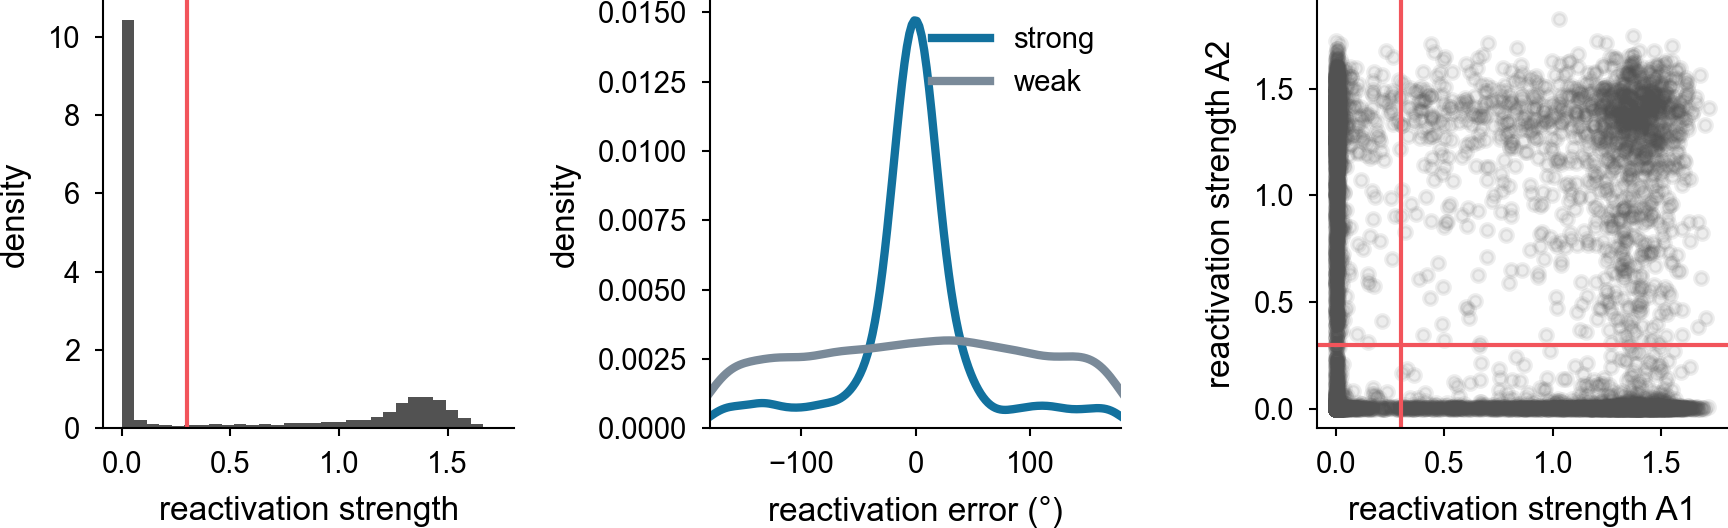

In [10]:
cut=0.3

df_chosen = df_models.loc[df_models.across_factor==0.002].copy().reset_index(drop=True)

f, ax = plt.subplots(1,3, figsize=(6,2.))
plt.subplots_adjust(wspace=0.3)

# histogram of reactivation strengths
ax[0].hist(df_chosen.reactstrength_area1.values, density=True, bins=30, color='#525252')
ax[0].axvline(cut, color='#F2545B')
ax[0].set_xlabel('reactivation strength')
ax[0].set_ylabel('density')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

# location of weak vs strong reactivations
binspace = np.linspace(-180, 180, 16)
df_weakR = df_chosen.loc[df_chosen.reactstrength_area1 <= cut]
df_strongR = df_chosen.loc[df_chosen.reactstrength_area1 > cut]
sns.kdeplot(np.rad2deg(circdist(df_strongR.reactivation_area1.values,\
                               (df_strongR.stim1_location_rad.values))),\
                      color=colors['Reactivation'], label='strong', linewidth= 2, ax = ax[1])
sns.kdeplot(np.rad2deg(circdist(df_weakR.reactivation_area1.values,\
                               (df_weakR.stim1_location_rad.values))),\
                      color=colors['ReactivationWeak'], label='weak', linewidth= 2, ax = ax[1])
ax[1].set_xlabel('reactivation error (°)')
ax[1].set_ylabel('density')
ax[1].set_xlim([-180, 180])
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')
ax[1].legend()
sns.despine()
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

# correlation of reactivation strengths
ax[2].scatter(df_chosen.reactstrength_area1, df_chosen.reactstrength_area2, alpha=0.1, color='#525252')
ax[2].axhline(cut, color='#F2545B')
ax[2].axvline(cut, color='#F2545B')
ax[2].set_xlabel('reactivation strength A1')
ax[2].set_ylabel('reactivation strength A2')
ax[2].xaxis.set_ticks_position('bottom')
ax[2].yaxis.set_ticks_position('left')

plt.tight_layout()
#plt.savefig('./Figures/Figure4/ModelComparison_Reactivations.svg')
plt.show()

In [11]:
### number of reactivations

num_react1 = len(np.where(df_models.reactstrength_area1.values>0.5)[0])
num_react2 = len(np.where(df_models.reactstrength_area2.values>0.5)[0])
num_react = num_react1+num_react2

print('Percentage of reactivations across model types: '+str(num_react1/len(df_models)*100))
print('Percentage of reactivations across model types, across areas: '+\
      str(np.round(num_react/(2*len(df_models))*100, 2))+'%')

Percentage of reactivations across model types: 37.56833333333333
Percentage of reactivations across model types, across areas: 38.11%


### Figure 4g: Serial bias

In [12]:
df_models['prev_curr'] = circdist(df_models.stim1_location_rad.values, df_models.stim2_location_rad.values)
df_models['error2_area1'] = circdist(df_models.response2_area1.values, df_models.stim2_location_rad.values)
df_models['error2_area2'] = circdist(df_models.response2_area2.values, df_models.stim2_location_rad.values)

#bump_average_a1 = np.array([np.array(df.bump_average_area1[i]) for i in df.index])
bump_average_a1 = np.array([np.array(df_models.bump_average_area1[i])\
                            for i in df_models.index])
bump_average_a2 = np.array([np.array(df_models.bump_average_area2[i]) for i in df_models.index])

# compute current trial's error
error_a1 = np.array([circdist(bump_average_a1[i][index_stim2start+1], df_models.stim2_location_rad[i])\
            for i in range(len(bump_average_a1))])
error_a2 = np.array([circdist(bump_average_a2[i][index_stim2start+1], df_models.stim2_location_rad[i])\
            for i in range(len(bump_average_a1))])

df_models['earlyerror'] = circmean([error_a1, error_a2], low=-np.pi, high=np.pi, axis=0)


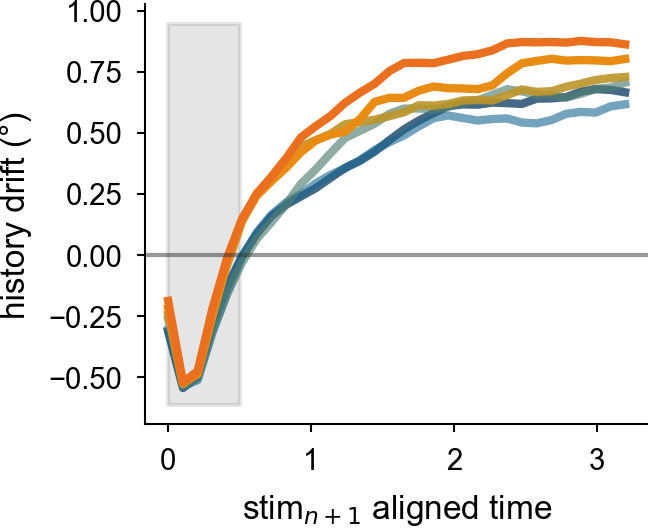

In [13]:
import statsmodels.formula.api as smf

df = df_models.copy()
bump_average_a1 = np.array([np.array(df.bump_average_area1[i])\
                            for i in df.index])
bump_average_a2 = np.array([np.array(df.bump_average_area2[i]) for i in df.index])


bias_estimate = -dog1(DoG_SIGMA, df.prev_curr)#sign_rl(df_sess.prev_curr.values)#
df['bias_estimate'] = bias_estimate
df['bumpavg_a1'] = list(bump_average_a1)
df['bumpavg_a2'] = list(bump_average_a2)

# compute DECODER SD for different time points in the CURRENT delay
sd_term_models=[]
sd_term_sem_models=[]
f, ax = plt.subplots(figsize=(2.4,2.))
xx_stim2 = np.linspace(0, (len(bump_average_a1[0])-index_stim2start)*df_models.steps.unique()[0],\
                   len(bump_average_a1[0])-index_stim2start)
for s, strength in enumerate(conn_strengths[:-1]):
    df_helper = df.loc[df.across_factor==strength].copy().reset_index(drop=True)
    sd_term=[]
    sd_term_sem=[]
    for t, timing in enumerate(range(index_stim2start, bump_average_a1.shape[1])):
        # get average prediction error in defined timesteps
        err_area1 = [circdist(df_helper.bumpavg_a1[i][timing], df_helper.stim2_location_rad[i])[0]\
                                      for i in df_helper.index]
        err_area2 = [circdist(df_helper.bumpavg_a2[i][timing], df_helper.stim2_location_rad[i])[0]\
                                      for i in df_helper.index]
        df_helper['prederr_delaystep'] = circmean([err_area1, err_area2], low=-np.pi, high=np.pi, axis=0)

        # fit model
        model = smf.ols('prederr_delaystep ~ bias_estimate', data=df_helper).fit()

        #save parameter of model
        sd_term.append(np.rad2deg(model.params['bias_estimate']))  
        sd_term_sem.append(np.rad2deg(model.bse['bias_estimate']))  
    sd_term_models.append(sd_term)
    sd_term_sem_models.append(sd_term_sem)
    ax.plot(xx_stim2, sd_term, color=colors_conn[strength],\
            label=np.unique(df_helper['across_factor_label'])[0], lw=2)

sd_avg = np.mean(sd_term_models, axis=0)

ax.axhline(0, color='#333333', alpha=0.5)
# mark time periods
y0,y1 = ax.get_ylim()
ax.fill_between([0, time_stim2end-time_stim2start],\
                  [y0,y0], [y1,y1], color='grey', alpha=0.2)
ax.set_xlabel('stim$_{n+1}$ aligned time')
ax.set_ylabel('history drift (°)')
sns.despine()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.tight_layout()
#plt.savefig('./Figures/Figure4/ModelComparison_SerialBias.svg')
plt.show()

### Figure h: Attraction to reactivation

In [14]:
df_models['rel_react_area1'] = circdist(df_models.reactivation_area1.values, (df_models.stim2_location_rad.values))
df_models['rel_react_area2'] = circdist(df_models.reactivation_area2.values, (df_models.stim2_location_rad.values))


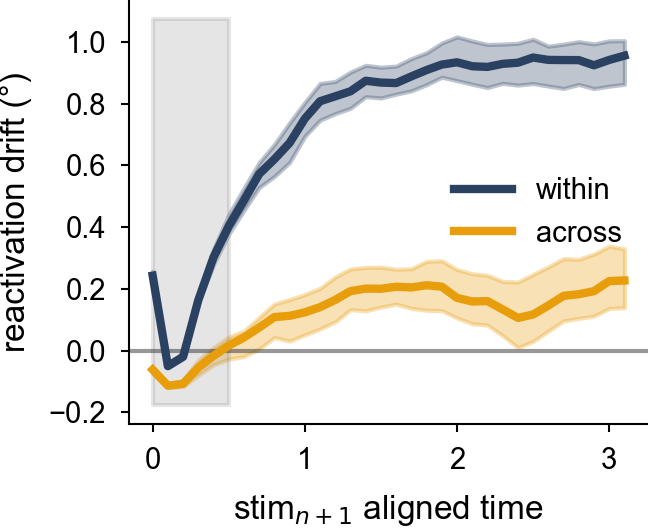

In [15]:
import statsmodels.formula.api as smf

df_chosen = df_models.loc[df_models.across_factor==0.002].copy().reset_index(drop=True)
#df_chosen = df_untuned.copy().reset_index(drop=True)

bump_average_a1 = np.array([np.array(df_chosen.bump_average_area1[i])\
                            for i in df_chosen.index])
bump_average_a2 = np.array([np.array(df_chosen.bump_average_area2[i]) for i in df_chosen.index])

# get predictions during next delay
bump_error_a1 = [circdist(bump_average_a1[i], (df_chosen.stim2_location_rad[i])) for i in range(len(bump_average_a1))]
bump_error_a2 = [circdist(bump_average_a2[i], (df_chosen.stim2_location_rad[i])) for i in range(len(bump_average_a1))]

error_area1 = np.array(bump_error_a1)[:,index_stim2start:]
error_area2 = np.array(bump_error_a2)[:,index_stim2start:]

# real Dog fit
df_helper = pd.DataFrame()
# looking at left erors so left reactivations are within, right across
df_helper['dog_reldist_area1'] = -dog1(DoG_SIGMA, df_chosen['rel_react_area1'])
df_helper['dog_reldist_area2'] = -dog1(DoG_SIGMA, df_chosen['rel_react_area2'])
DoGfit_within = []
DoGfit_across = []
for t in range(len(error_area1[0])): # run through each delay time step
    # within
    df_side = pd.DataFrame()
    df_side['errors'] = np.append(error_area1[:,t], error_area2[:,t], axis=0)
    df_side['DoG_within'] = np.append(df_helper['dog_reldist_area1'].values,\
                                        df_helper['dog_reldist_area2'].values, axis=0)
    M_w = smf.ols(formula="errors ~ DoG_within", data = df_side).fit()
    DoGfit_within.append(M_w.params['DoG_within'])
    # across
    df_side['DoG_across'] = np.append(df_helper['dog_reldist_area2'].values,\
                                        df_helper['dog_reldist_area1'].values, axis=0)
    M_a = smf.ols(formula="errors ~ DoG_across", data = df_side).fit()
    DoGfit_across.append(M_a.params['DoG_across'])

# # bootstrap for errorbars
repeats = 25
DoGfit_within_bt = np.empty((repeats, error_area1.shape[1]))*np.nan
DoGfit_across_bt = np.empty((repeats, error_area1.shape[1]))*np.nan
for r in range(repeats):
    trials = range(error_area1.shape[0]) 
    bt_trials = random.sample(trials, int(len(df_chosen)/2))
    df_helper = pd.DataFrame()
    df_helper['dog_reldist_area1'] = -dog1(DoG_SIGMA, df_chosen['rel_react_area1'][bt_trials])
    df_helper['dog_reldist_area2'] = -dog1(DoG_SIGMA, df_chosen['rel_react_area2'][bt_trials])
    for t in range(len(error_area1[0])):
        df_side = pd.DataFrame()
        df_side['errors'] = np.append(error_area1[bt_trials,t], error_area2[bt_trials,t], axis=0)
        df_side['DoG_within'] = np.append(df_helper['dog_reldist_area1'].values,\
                                            df_helper['dog_reldist_area2'].values, axis=0)
        M_w = smf.ols(formula="errors ~ DoG_within", data = df_side).fit()
        DoGfit_within_bt[r,t] = M_w.params['DoG_within']
        # across
        df_side['DoG_across'] = np.append(df_helper['dog_reldist_area2'].values,\
                                            df_helper['dog_reldist_area1'].values, axis=0)
        M_a = smf.ols(formula="errors ~ DoG_across", data = df_side).fit()
        DoGfit_across_bt[r,t] = M_a.params['DoG_across']

low_CI_within = np.percentile(DoGfit_within_bt, 16, axis=0)
high_CI_within = np.percentile(DoGfit_within_bt, 84, axis=0)
low_CI_across = np.percentile(DoGfit_across_bt, 16, axis=0)
high_CI_across = np.percentile(DoGfit_across_bt, 84, axis=0)

# PLOT
time_ax = np.linspace(0, (len(error_area1[0])-1)*df.steps.unique()[0], len(error_area1[0]))

#f,ax = plt.subplots(figsize=(4.8, 2.1))
f,ax = plt.subplots(figsize=(2.4, 2.))
ax.axhline(0, color='#333333', alpha=0.5)
ax.plot(time_ax,np.rad2deg(DoGfit_within), color=colors['Within'], label='within', lw=2)
ax.fill_between(time_ax, np.rad2deg(low_CI_within), np.rad2deg(high_CI_within), color=colors['Within'], alpha=0.3)
ax.plot(time_ax,np.rad2deg(DoGfit_across), color=colors['Across'], label='across', lw=2)
ax.fill_between(time_ax, np.rad2deg(low_CI_across), np.rad2deg(high_CI_across), color=colors['Across'], alpha=0.3)
# mark time periods
y0,y1 = ax.get_ylim()
ax.fill_between([0, time_stim2end-time_stim2start],\
                  [y0,y0], [y1,y1], color='grey', alpha=0.2)
ax.set_xlabel('stim$_{n+1}$ aligned time')
ax.set_ylabel('reactivation drift (°)')
#plt.ylim([-0.5, 4])
plt.legend()
sns.despine()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.tight_layout()
#plt.savefig('./Figures/Figure4/ModelComparison_ReactivationBiasWithinAcross.svg')
plt.show()

### Figure 4i: Reactivation bias comparison in last time point

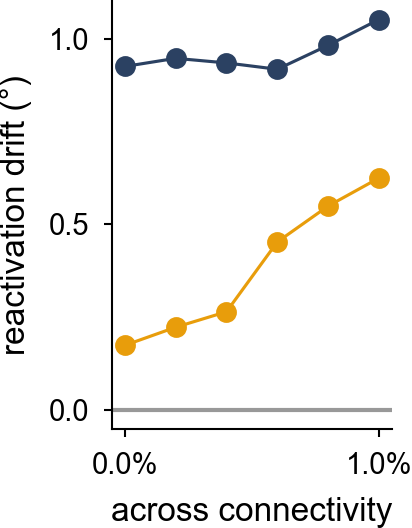

In [16]:
import statsmodels.formula.api as smf

# compute current trial's error
df_models['responseerr_a1'] = circdist(df_models.response2_area1.values, (df_models.stim2_location_rad.values))
df_models['responseerr_a2'] = circdist(df_models.response2_area2.values, (df_models.stim2_location_rad.values))
# compute relative distance of previous reactivation
prevreact_curr_a1 = circdist(df_models.reactivation_area1.values, df_models.stim2_location_rad.values)
prevreact_curr_a2 = circdist(df_models.reactivation_area2.values, df_models.stim2_location_rad.values)
# Dog fit
df_models['dog_reldist_area1'] = -dog1(DoG_SIGMA, prevreact_curr_a1)
df_models['dog_reldist_area2'] = -dog1(DoG_SIGMA, prevreact_curr_a2)

f,ax = plt.subplots(figsize=(1.6, 2))
DoGfit_within = []
DoGfit_across = []
pvalues = {f:np.nan for f in conn_strengths[::-1]}
low_CI_within=[]
high_CI_within=[]
low_CI_across=[]
high_CI_across=[]
for s, strength in enumerate(conn_strengths):
    df = df_models.loc[df_models.across_factor==strength].copy().reset_index(drop=True)

    
    # within drift
    df_side = pd.DataFrame()
    df_side['errors'] = np.append(df.responseerr_a1, df.responseerr_a2, axis=0)
    df_side['DoG_within'] = np.append(df['dog_reldist_area1'].values,\
                                        df['dog_reldist_area2'].values, axis=0)
    M_w = smf.ols(formula="errors ~ DoG_within", data = df_side).fit()
    DoGfit_within.append(M_w.params['DoG_within'])
    
    # across drift
    df_side['DoG_across'] = np.append(df['dog_reldist_area2'].values,\
                                        df['dog_reldist_area1'].values, axis=0)
    M_a = smf.ols(formula="errors ~ DoG_across", data = df_side).fit()
    DoGfit_across.append(M_a.params['DoG_across'])
    pvalues[strength] = M_a.pvalues['DoG_across']
                         
    # # bootstrap for errorbars
    repeats = 25
    DoGfit_within_bt = np.empty((repeats))*np.nan
    DoGfit_across_bt = np.empty((repeats))*np.nan
    for r in range(repeats):
        trials = range(len(df)) 
        bt_trials = random.sample(trials, int(len(df)/2))
        df_helper = df.loc[bt_trials].copy()

        df_side = pd.DataFrame()
        df_side['errors'] = np.append(df.responseerr_a1[bt_trials], df.responseerr_a2[bt_trials], axis=0)
        df_side['DoG_within'] = np.append(df_helper['dog_reldist_area1'].values,\
                                            df_helper['dog_reldist_area2'].values, axis=0)
        M_w = smf.ols(formula="errors ~ DoG_within", data = df_side).fit()
        DoGfit_within_bt[r] = M_w.params['DoG_within']
        # across
        df_side['DoG_across'] = np.append(df_helper['dog_reldist_area2'].values,\
                                            df_helper['dog_reldist_area1'].values, axis=0)
        M_a = smf.ols(formula="errors ~ DoG_across", data = df_side).fit()
        DoGfit_across_bt[r] = M_a.params['DoG_across']

    low_CI_within.append(np.percentile(DoGfit_within_bt, 2.5, axis=0))
    high_CI_within.append(np.percentile(DoGfit_within_bt, 97.5, axis=0))
    low_CI_across.append(np.percentile(DoGfit_across_bt, 2.5, axis=0))
    high_CI_across.append(np.percentile(DoGfit_across_bt, 97.5, axis=0))

    # PLOT
ax.axhline(0, color='#333333', alpha=0.5)

ax.plot(conn_strengths[:-1], np.rad2deg(DoGfit_across[:-1]), color=colors['Across'],\
        marker='o', lw=.75, markersize=4)
# ax.scatter(conn_strengths[-1]+0.002, np.rad2deg(DoGfit_across[-1]), color='darkorange',\
#        marker='o')
ax.plot(conn_strengths[:-1], np.rad2deg(DoGfit_within[:-1]), color=colors['Within'],\
            marker='o', lw=.75, markersize=4)
# ax.scatter(conn_strengths[-1]+0.002, np.rad2deg(DoGfit_within[-1]), color='darkgreen',\
#        marker='o')
y0, y1 = ax.get_ylim()
ax.set_xlabel('across connectivity')
ax.set_ylabel('reactivation drift (°)')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticks([conn_strengths[0],\
             conn_strengths[5]])
ax.set_xticklabels([conn_strength_labels[0], conn_strength_labels[5]])
ax.set_yticks([0, 0.5, 1])
sns.despine()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.tight_layout()
#plt.savefig('./Figures/Figure4/ModelComparison_ReactivationBias.svg')
plt.show()

### Figure 4j: separate single and dual reactivations

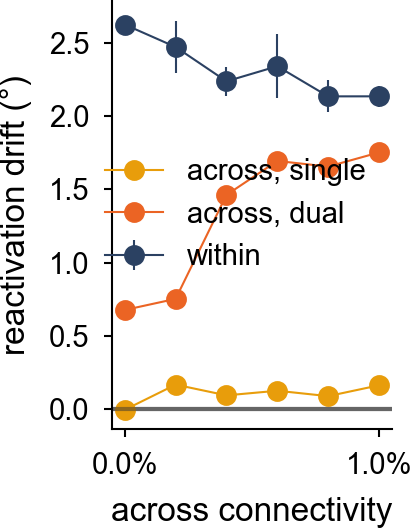

In [17]:
import statsmodels.formula.api as smf
from matplotlib.ticker import FormatStrFormatter

# compute current trial's error
df_models['responseerr_a1'] = circdist(df_models.response2_area1.values, (df_models.stim2_location_rad.values))
df_models['responseerr_a2'] = circdist(df_models.response2_area2.values, (df_models.stim2_location_rad.values))
# compute relative distance of previous reactivation
prevreact_curr_a1 = circdist(df_models.reactivation_area1.values, df_models.stim2_location_rad.values)
prevreact_curr_a2 = circdist(df_models.reactivation_area2.values, df_models.stim2_location_rad.values)
# Dog fit
df_models['dog_reldist_area1'] = -dog1(DoG_SIGMA, prevreact_curr_a1)
df_models['dog_reldist_area2'] = -dog1(DoG_SIGMA, prevreact_curr_a2)
        
# concatenate area 1 and area2
react_strength_both = np.append(df_models.reactstrength_area1.values, df.reactstrength_area2.values)
# how many reactivations are present in each trial
df_models['react_number'] = (df_models.reactstrength_area1.values > 0.5).astype(int) +\
                            (df_models.reactstrength_area2.values > 0.5).astype(int)
df_models['reactivated1'] = (df_models.reactstrength_area1.values > 0.5)
df_models['reactivated2'] = (df_models.reactstrength_area2.values > 0.5)


react_type = ['none', 'single', 'dual']
color_choiceA = ['grey', colors['Across'], '#eb6424']
DoGfit_within = {rn: [] for rn in react_type}
DoGfit_across = {rn: [] for rn in react_type}
low_CI_within={rn: [] for rn in react_type}
high_CI_within={rn: [] for rn in react_type}
low_CI_across={rn: [] for rn in react_type}
high_CI_across={rn: [] for rn in react_type}
pvalues = {f:np.nan for f in conn_strengths[::-1]}

f,ax = plt.subplots(figsize=(1.6, 2.), sharey=True)
for react_num, react in enumerate(react_type):
    if react_num == 0:
        continue
    df_rn = df_models.loc[df_models.react_number==react_num].copy().reset_index(drop=True)    
    for s, strength in enumerate(conn_strengths):
        df = df_rn.loc[df_rn.across_factor==strength].copy().reset_index(drop=True)
    
        # within drift
        df_side = pd.DataFrame()
        if react != 'single':
            df_side['errors'] = np.append(df['responseerr_a1'], df['responseerr_a2'], axis=0)
            df_side['DoG_within'] = np.append(df['dog_reldist_area1'].values,\
                                                df['dog_reldist_area2'].values, axis=0)
        else:
            # figure out which side has the reactivation, take error/reldist from there
            reactivatedArea = np.ones((len(df))).astype(int)
            reactivatedArea[np.where(df['reactivated2']==True)[0]] = 2
            df_side['errors'] = [df.loc[i, 'responseerr_a'+str(reactivatedArea[i])] for i in df.index]
            df_side['DoG_within'] = [df.loc[i, 'dog_reldist_area'+str(reactivatedArea[i])] for i in df.index]
            
        M_w = smf.ols(formula="errors ~ DoG_within", data = df_side).fit()
        DoGfit_within[react].append(M_w.params['DoG_within'])

        # across drift
        if react != 'single':
            df_side['DoG_across'] = np.append(df['dog_reldist_area2'].values,\
                                                df['dog_reldist_area1'].values, axis=0)
        else:
            notreactivated = [1 if i==2 else 2 for i in reactivatedArea]
            df_side['DoG_across'] = [df.loc[i, 'dog_reldist_area'+str(notreactivated[i])] for i in df.index]
        
        M_a = smf.ols(formula="errors ~ DoG_across", data = df_side).fit()
        DoGfit_across[react].append(M_a.params['DoG_across'])
        pvalues[strength] = M_a.pvalues['DoG_across']
                         
        # # bootstrap for errorbars
        repeats = 25
        DoGfit_within_bt = np.empty((repeats))*np.nan
        DoGfit_across_bt = np.empty((repeats))*np.nan
        for r in range(repeats):
            trials = range(len(df)) 
            bt_trials = random.sample(trials, int(len(df)/2))
            df_helper = df.loc[bt_trials].copy().reset_index()

            df_side = pd.DataFrame()
            if react != 'single':
                df_side['errors'] = np.append(df_helper['responseerr_a1'],\
                                              df_helper['responseerr_a2'], axis=0)
                df_side['DoG_within'] = np.append(df_helper['dog_reldist_area1'].values,\
                                                    df_helper['dog_reldist_area2'].values, axis=0)
            else:
                reactivatedArea = np.ones((len(df_helper))).astype(int)
                reactivatedArea[np.where(df_helper['reactivated2']==True)[0]] = 2
                df_side['errors'] = [df_helper.loc[i, 'responseerr_a'+str(reactivatedArea[i])]\
                                     for i in df_helper.index]
                df_side['DoG_within'] = [df_helper.loc[i, 'dog_reldist_area'+str(reactivatedArea[i])]\
                                         for i in df_helper.index]
            
            M_w = smf.ols(formula="errors ~ DoG_within", data = df_side).fit()
            DoGfit_within_bt[r] = M_w.params['DoG_within']
            # across
            if react != 'single':
                df_side['DoG_across'] = np.append(df_helper['dog_reldist_area2'].values,\
                                                    df_helper['dog_reldist_area1'].values, axis=0)
            else:
                notreactivated = [1 if i==2 else 2 for i in reactivatedArea]
                df_side['DoG_across'] = [df_helper.loc[i, 'dog_reldist_area'+str(notreactivated[i])]\
                                         for i in df_helper.index]
            M_a = smf.ols(formula="errors ~ DoG_across", data = df_side).fit()
            DoGfit_across_bt[r] = M_a.params['DoG_across']

        low_CI_within[react].append(np.percentile(DoGfit_within_bt, 2.5, axis=0))
        high_CI_within[react].append(np.percentile(DoGfit_within_bt, 97.5, axis=0))
        low_CI_across[react].append(np.percentile(DoGfit_across_bt, 2.5, axis=0))
        high_CI_across[react].append(np.percentile(DoGfit_across_bt, 97.5, axis=0))

    # PLOT
    
    ax.axhline(0, color='#333333', alpha=0.5)
    ax.plot(conn_strengths[:-1], np.rad2deg(DoGfit_across[react][:-1]), color=color_choiceA[react_num],\
            marker='o', lw=.5, label = 'across, ' + react, markersize=4)
    y0, y1 = ax.get_ylim()
    ax.set_xlabel('across connectivity')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ax.set_xticks([conn_strengths[0],conn_strengths[5]])#, conn_strengths[-1]
    ax.set_xticklabels([conn_strength_labels[0],\
                    conn_strength_labels[5]])#, conn_strength_labels[-1]
    sns.despine()
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
ax.errorbar(conn_strengths[:-1], np.rad2deg(np.mean([DoGfit_within['single'][:-1], DoGfit_within['dual'][:-1]], axis=0)),\
             yerr = np.rad2deg(sem([DoGfit_within['single'][:-1], DoGfit_within['dual'][:-1]], axis=0)),\
             color=colors['Within'], marker='o', lw=.5, label='within', markersize=4)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#ax.errorbar(conn_strengths[-1], np.rad2deg(np.mean([DoGfit_within['single'][-1], DoGfit_within['dual'][-1]])),\
#             yerr = np.rad2deg(sem([DoGfit_within['single'][-1], DoGfit_within['dual'][-1]])),\
#             color='darkgreen', marker='o', lw=.5, label='within')
ax.set_ylabel('reactivation drift (°)')
plt.legend()
plt.tight_layout()
#plt.savefig('./Figures/Figure4/ModelComparison_ReactivationBias_SingleDualCombined.svg')
plt.show()

### Figure 4k: Reactivation types

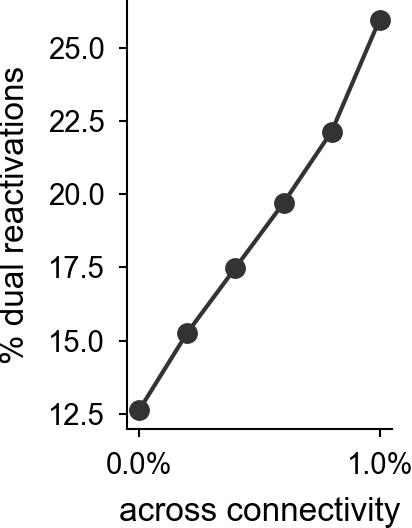

In [18]:
f,ax = plt.subplots(figsize=(1.6, 2.))
sns.despine()
percent_dual=[]
for s, strength in enumerate(conn_strengths[:-1]):
    df = df_models.loc[df_models.across_factor==strength].copy().reset_index(drop=True)
    
    dualreact = len(np.where((df.reactstrength_area1 > cut) & (df.reactstrength_area2 > cut))[0])
    singlereact = len(np.where(((df.reactstrength_area1 > cut) & (df.reactstrength_area2 <= cut)|
                           (df.reactstrength_area1 <= cut) & (df.reactstrength_area2 > cut)))[0])
    noreact = len(np.where((df.reactstrength_area1 <= cut) & (df.reactstrength_area2 <= cut))[0])
    percent_dual.append((dualreact/(len(df)))*100)
                           
ax.plot(conn_strengths[:-1], percent_dual, color='#333333', marker='o', markersize=4)
ax.set_xticks([conn_strengths[0],conn_strengths[5]])#, conn_strengths[-1]
ax.set_xticklabels([conn_strength_labels[0],\
                conn_strength_labels[5]])#, conn_strength_labels[-1]
ax.set_ylabel('% dual reactivations')
ax.set_xlabel('across connectivity')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.tight_layout()
#plt.savefig('./Figures/Figure4/ModelComparison_ConnectivityvsReactivationType.svg')